# KMeans
- K개의 그룹(중심점을 기준)으로 데이터 포인트를 나눔

![](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif?20170530143526)

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html


**작동 단계**
1. K개의 중심점 임의 선택
2. 각 데이터 포인트를 가장 가까운 중심점에 할당 -> 군집 형성
3. 각 군집의 데이터 포인트 기반으로 새로운 중심점 계산
4. 2-3 단계를 중심점의 변화가 거의 없을 때까지 반복 실행


**장단점**
- 장점
    - 간단한 개념과 구현
    - 빠른 계산 속도
    - 일반적인 군집화에서 가장 많이 활용되며 대용량 데이터에도 활용 가능
- 단점
    - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도 떨어짐
    - 반복적으로 수행하므로 반복 횟수가 많아지면 수행 시간 느려짐
    - 이상치(outlier) 데이터에 취약
    - 군집이 원형 구조가 아닐 경우 성능 저하 가능성

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target # 0: setosa, 1: versicolor, 2: virginica

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,       #클러스터 개수 (= 중심점 개수 / 원래 기본값은 8) 
    init='k-means++',   # 초기 중심점 설정방식 | k-means++는 조금 더 똑똑하게 중심값을 잡아줌, 첫 번째 중심은 랜덤하게 잡아주고, 그 다음 중심은 처음에 잡아준 것과 멀리 떨어진 점을 선택해줌 | k-means++ 말고 랜덤하게 잡아주는 설정도 있음
    max_iter=300,       # 최대 반복 횟수
    random_state=0      # 난수 시드 고정
)

kmeans.fit(iris.data)   # 중심점 찾기 # 클러스터링에서 fit은 중심점을 찾는 역할
distances = kmeans.transform(iris.data) # fit을 통해 중심점을 찾은 것을 기반으로 라벨 데이터들과 중심점들의 거리를 계산 및 반환해줌
distances

array([[3.41251117, 0.14135063, 5.03132789],
       [3.38963991, 0.44763825, 5.08750645],
       [3.56011415, 0.4171091 , 5.25229169],
       [3.412319  , 0.52533799, 5.12704282],
       [3.4603117 , 0.18862662, 5.07638109],
       [3.14251434, 0.67703767, 4.6529179 ],
       [3.50715704, 0.4151867 , 5.18485505],
       [3.32903073, 0.06618157, 4.97466956],
       [3.56110404, 0.80745278, 5.3020706 ],
       [3.34972272, 0.37627118, 5.04034023],
       [3.31978466, 0.4824728 , 4.86909709],
       [3.30275389, 0.25373214, 4.96948678],
       [3.45734945, 0.50077939, 5.1637448 ],
       [3.89486669, 0.91322505, 5.62559662],
       [3.64453145, 1.01409073, 5.07819914],
       [3.49280098, 1.20481534, 4.85660046],
       [3.49087612, 0.6542018 , 5.00219478],
       [3.37762449, 0.1441527 , 4.99534695],
       [3.10971292, 0.82436642, 4.58840834],
       [3.37135761, 0.38933276, 4.94411371],
       [3.06922637, 0.46344363, 4.66670189],
       [3.30868004, 0.3286031 , 4.89580185],
       [3.

In [ ]:
# 군집화 결과
iris_df['cluster'] = kmeans.labels_
iris_df.groupby('species')['cluster'].value_counts()
# 클러스터링한 결과가 target 데이터와 정확히 같진 않지만 같은 종류라고 분류는 해줌 물론 모호한 부분이 있긴 함!

species  cluster
0        1          50
1        0          47
         2           3
2        2          36
         0          14
Name: count, dtype: int64

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
iris_df['pca1'] = pca_transformed[:,0]
iris_df['pca2'] = pca_transformed[:,1]

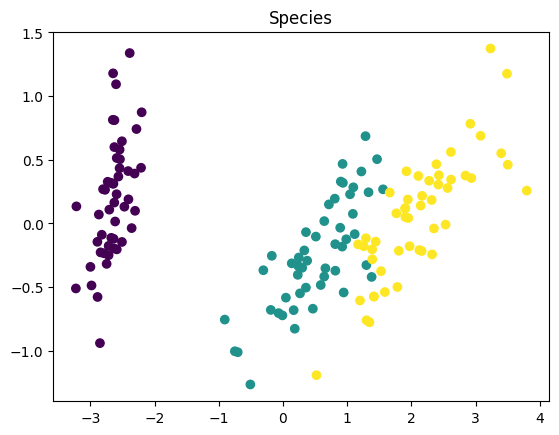

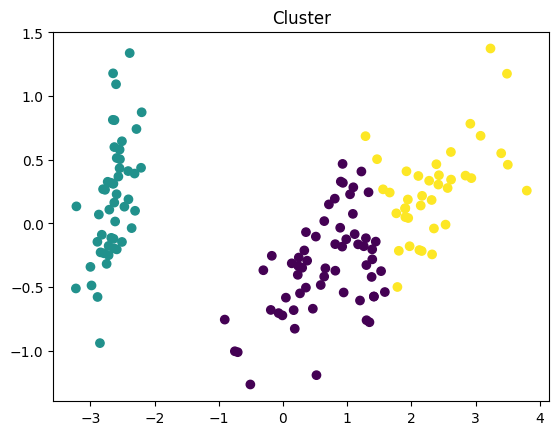

In [ ]:
# species(라벨 데이터 기준 시각화)
plt.scatter(x=iris_df['pca1'], y=iris_df['pca2'], c=iris_df['species'])
plt.title('Species')
plt.show()

# cluster(kmeans 군집 데이터) 기준 시각화
plt.scatter(x=iris_df['pca1'], y=iris_df['pca2'], c=iris_df['cluster'])
plt.title('Cluster')
plt.show()